In [11]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import os

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

# Parameters 
TICKERS = ['TSLA', 'BND', 'SPY']
START_DATE = '2015-07-01'
END_DATE = '2025-07-31' 

# Data Extraction
print(f"Fetching data for {', '.join(TICKERS)} from {START_DATE} to {END_DATE}...")
try:
    data = yf.download(TICKERS, start=START_DATE, end=END_DATE)
    print("Data fetched successfully!")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows to verify
print("\nFirst 5 rows of the dataset:")
print(data.head())

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_15832\1439426019.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKERS, start=START_DATE, end=END_DATE)
[*********************100%***********************]  3 of 3 completed

Fetching data for TSLA, BND, SPY from 2015-07-01 to 2025-07-31...
Data fetched successfully!

First 5 rows of the dataset:
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816715  174.917084  17.943333  60.914441  175.363859   
2015-07-02  60.967052  174.756943  18.667999  61.027194  175.566203   
2015-07-06  61.177582  174.259567  18.648001  61.222691  175.043527   
2015-07-07  61.237717  175.355453  17.858667  61.470758  175.481894   
2015-07-08  61.410625  172.413528  16.997334  61.463248  174.293357   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764093  174.124686  17.856667  60.794164   
2015-07-02  18.830000  60.93

In [12]:
# Basic Data Inspection
print("\n Data Information ")
data.info()

# Check for Missing Values
print("\n Missing Values Count ")
print(data.isnull().sum())


 Data Information 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, BND)    2535 non-null   float64
 1   (Close, SPY)    2535 non-null   float64
 2   (Close, TSLA)   2535 non-null   float64
 3   (High, BND)     2535 non-null   float64
 4   (High, SPY)     2535 non-null   float64
 5   (High, TSLA)    2535 non-null   float64
 6   (Low, BND)      2535 non-null   float64
 7   (Low, SPY)      2535 non-null   float64
 8   (Low, TSLA)     2535 non-null   float64
 9   (Open, BND)     2535 non-null   float64
 10  (Open, SPY)     2535 non-null   float64
 11  (Open, TSLA)    2535 non-null   float64
 12  (Volume, BND)   2535 non-null   int64  
 13  (Volume, SPY)   2535 non-null   int64  
 14  (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 316.9 KB

 Missing Values Count 
Price   Ticke

In [ ]:
# Data Cleaning and Understanding 

# Handle missing values using interpolation
print("\nHandling missing values using interpolation...")
data.interpolate(method='linear', inplace=True)

close_prices = data['Close']
print("\n--- Summary Statistics for Close Prices ---")
print(close_prices.describe())



Handling missing values using interpolation...

--- Summary Statistics for Close Prices ---
Ticker          BND          SPY         TSLA
count   2535.000000  2535.000000  2535.000000
mean      68.469188   334.193732   131.963002
std        4.554602   126.427703   120.914904
min       60.779160   155.869797     9.578000
25%       64.654335   230.083199    18.967667
50%       67.604866   305.264496    94.571335
75%       71.891136   420.350510   236.761665
max       77.318268   637.099976   479.859985


Plot saved to ../reports/figures/01_close_prices.png


<Figure size 1500x700 with 0 Axes>

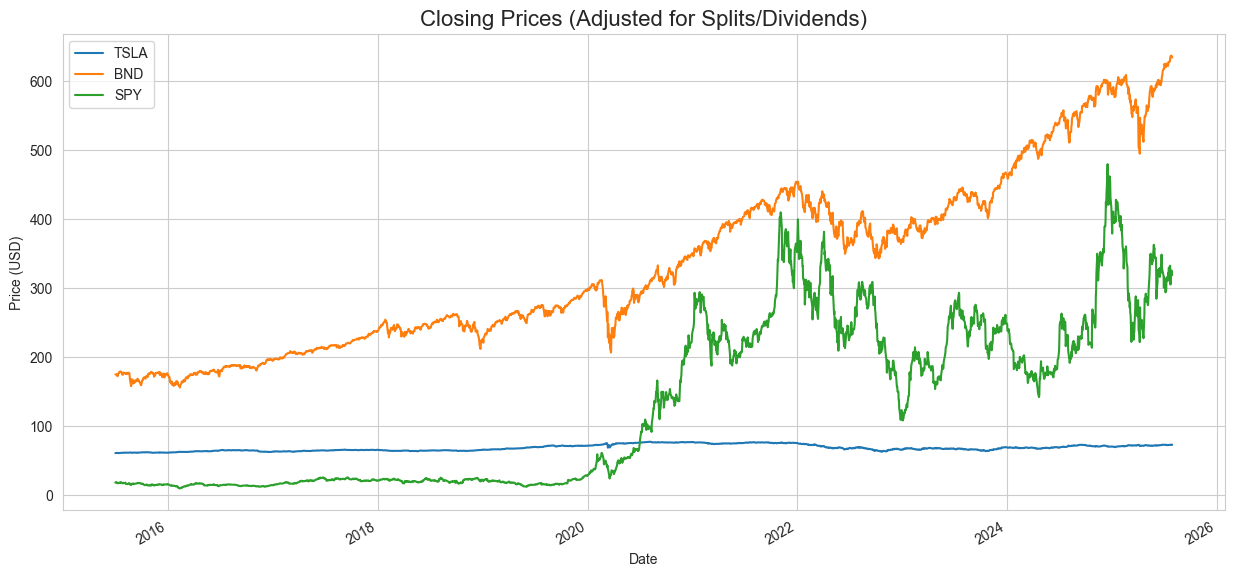

In [23]:
FIGURES_PATH = '../reports/figures/'
os.makedirs(FIGURES_PATH, exist_ok=True)

# Plot the closing prices
plt.figure()
close_prices.plot()
plt.title('Closing Prices (Adjusted for Splits/Dividends)', fontsize=16) # Updated title
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(TICKERS)
plt.savefig(os.path.join(FIGURES_PATH, '01_close_prices.png'), dpi=300)
print(f"Plot saved to {os.path.join(FIGURES_PATH, '01_close_prices.png')}")
plt.show()


Plot saved to ../reports/figures/02_daily_returns.png


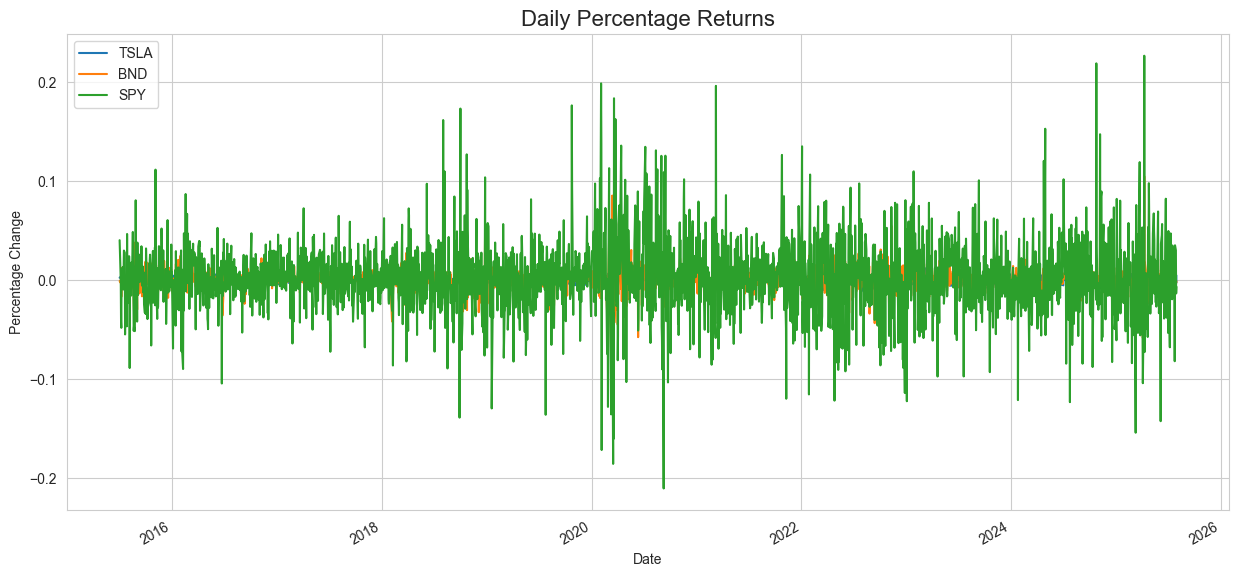

Plot saved to ../reports/figures/03_rolling_volatility.png


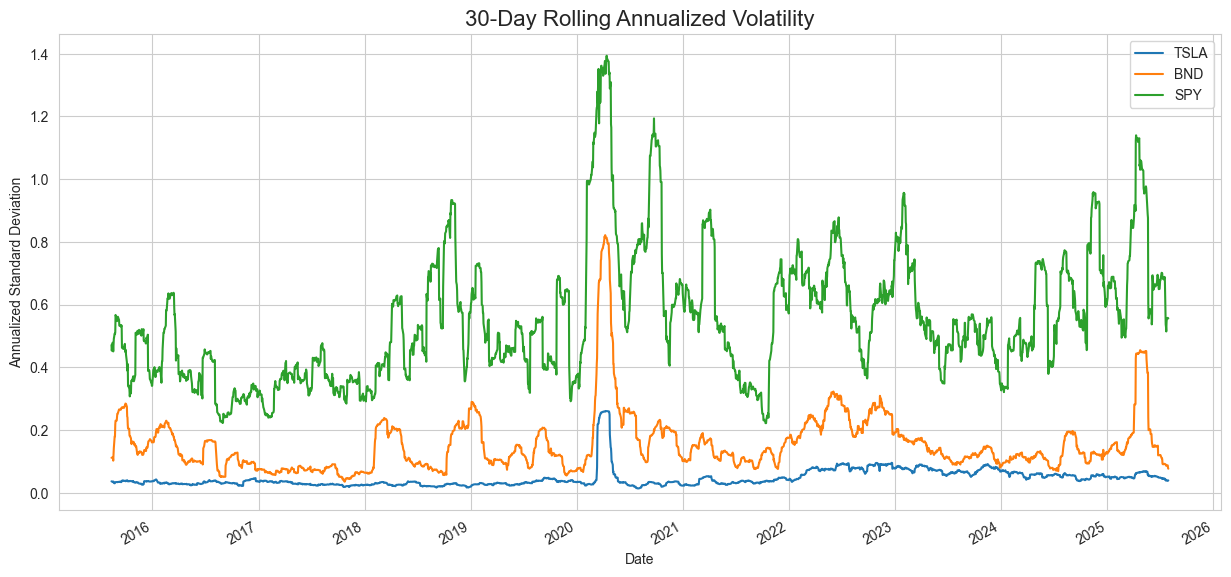

In [24]:
# Calculate and Plot Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Plot daily returns
daily_returns.plot()
plt.title('Daily Percentage Returns', fontsize=16)
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.legend(TICKERS)
plt.savefig(os.path.join(FIGURES_PATH, '02_daily_returns.png'), dpi=300)
print(f"Plot saved to {os.path.join(FIGURES_PATH, '02_daily_returns.png')}")
plt.show()

# Analyze Volatility with Rolling Statistics
rolling_volatility = daily_returns.rolling(window=30).std() * np.sqrt(252) # Annualized

rolling_volatility.plot()
plt.title('30-Day Rolling Annualized Volatility', fontsize=16)
plt.ylabel('Annualized Standard Deviation')
plt.xlabel('Date')
plt.legend(TICKERS)
plt.savefig(os.path.join(FIGURES_PATH, '03_rolling_volatility.png'), dpi=300)
print(f"Plot saved to {os.path.join(FIGURES_PATH, '03_rolling_volatility.png')}")
plt.show()

In [ ]:
#Seasonality and Stationarity Analysis 

def adf_test(series, name=''):
    """Performs the ADF test and prints the results."""
    print(f'--- Augmented Dickey-Fuller Test on {name} ---')
    result = adfuller(series.dropna())
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label} : {value}')
    
    if result[1] <= 0.05:
        print("Conclusion: Strong evidence against the null hypothesis. The series is stationary.")
    else:
        print("Conclusion: Weak evidence against null hypothesis. The series is non-stationary.")


In [26]:
# Test 1: On the 'Close' price of Tesla
adf_test(close_prices['TSLA'], name='TSLA Closing Price')

print("\n" + "="*50 + "\n")

# Test 2: On the daily returns of Tesla
adf_test(daily_returns['TSLA'], name='TSLA Daily Returns')


--- Augmented Dickey-Fuller Test on TSLA Closing Price ---
ADF Test Statistic : -1.4188720053968273
p-value : 0.5731959514207222
#Lags Used : 27
Number of Observations Used : 2507
Conclusion: Weak evidence against null hypothesis. The series is non-stationary.


--- Augmented Dickey-Fuller Test on TSLA Daily Returns ---
ADF Test Statistic : -34.68109047254185
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 2532
Conclusion: Strong evidence against the null hypothesis. The series is stationary.
ADF Test Statistic : -1.4188720053968273
p-value : 0.5731959514207222
#Lags Used : 27
Number of Observations Used : 2507
Conclusion: Weak evidence against null hypothesis. The series is non-stationary.


--- Augmented Dickey-Fuller Test on TSLA Daily Returns ---
ADF Test Statistic : -34.68109047254185
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 2532
Conclusion: Strong evidence against the null hypothesis. The series is stationary.


In [27]:
# Analyze Volatility and Risk Metrics ---

# Value at Risk (VaR)
var_95 = daily_returns.quantile(0.05)
print("\n 95% Daily Value at Risk (VaR)")
print(round(var_95 * 100, 2).astype(str) + '%')

# Sharpe Ratio
RISK_FREE_RATE = 0.02
annualized_returns = daily_returns.mean() * 252
annualized_volatility = daily_returns.std() * np.sqrt(252)
sharpe_ratio = (annualized_returns - RISK_FREE_RATE) / annualized_volatility
print("\n Annualized Sharpe Ratio ")
print(sharpe_ratio)


 95% Daily Value at Risk (VaR)
Ticker
BND     -0.49%
SPY     -1.72%
TSLA    -5.47%
Name: 0.05, dtype: object

 Annualized Sharpe Ratio 
Ticker
BND    -0.007295
SPY     0.684428
TSLA    0.744550
dtype: float64


In [28]:
# Save Processed Data 
PROCESSED_DATA_PATH = '../data/processed/'
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

close_prices.to_csv(f'{PROCESSED_DATA_PATH}close_prices.csv')
daily_returns.to_csv(f'{PROCESSED_DATA_PATH}daily_returns.csv')

print(f"\nProcessed data saved to {PROCESSED_DATA_PATH}")


Processed data saved to ../data/processed/
